# ![](logo-itd.png)

<div style = " Text-align: center">
    
# Analisis de Datos Masivos

## Práctica de laboratorio: Análisis de correlación en Python

### Rodriguez Rivas Jose Gabriel

### Rubio Covarrubias Julio

</div>

In [1]:
import pandas as pd
brainFile = 'brainsize.txt'
brainFrame = pd.read_csv(brainFile)

In [2]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


Parte 2: Gráficos de dispersión y variables correlacionables
Paso 1: El método Pandas describe().
El módulo de Pandas incluye el método describe() que realiza los mismos cálculos comunes sobre un conjunto de datos determinado. Además de proporcionar resultados comunes, incluidos el conteo, el promedio, la desviación estándar, el mínimo y el máximo, describe() también es una excelente manera de probar rápidamente la validez de los valores de la estructura de datos.

Ejecutar la siguiente celda para emitir los resultado computados por describe() según la estructura de datos brainFrame.

In [3]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

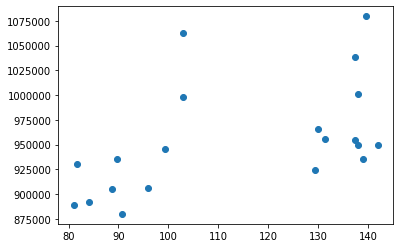

In [6]:
%matplotlib inline
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()

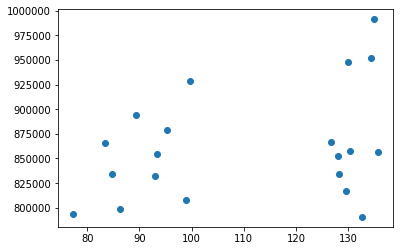

In [7]:
%matplotlib inline
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()

Parte 3: Calcular la correlación con Python
Paso 1: Cálculo de la correlación según brainFrame
El método pandas corr()) ofrece una manera fácil de calcular la correlación según una estructura de datos. Simplemente empleando el método según una estructura de datos, uno puede obtener la correlación entre todas las variables al mismo tiempo.

In [8]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


In [9]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


Observe la diagonal de izquierda a derecha en la tabla de correlación generada arriba. ¿Por qué la diagonal está plagada de 1? ¿Se trata de una coincidencia?

Por que es la misma variable y no puede haber si se trata de la misma.

Si continuamos observando la tabla de correlación que figura arriba, notaremos que los valores se duplican; los valores debajo de la diagonal 1 tienen valores homólogos duplicados sobre la diagonal 1. ¿Se trata de una coincidencia?

Si puede ser una coincidencia ya que si los valores son iguales a 1 es que si hay correlacion

In [10]:
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


Parte 4: Visualización
Paso 1: Instalar Seaborn
Para que sea más sencillo visualizar las correlaciones de datos, se pueden utilizar mapas de calor. Según los cuadros de color, los gráficos del mapa de calor pueden ayudar a identificar correlaciones al instante.

El módulo de Python denominado seaborn facilita el trazado de los gráficos de los mapas de calor.

Primero, ejecute la siguiente celda para descargar e instalar  seaborn.

In [12]:
import seaborn as sns

womenNoGenderDf = womenDf.drop('Gender', axis=1)
menNoGenderDf = menDf.drop('Gender', axis=1)

womenNoGenderDf = womenNoGenderDf[womenNoGenderDf.columns].astype(float)
menNoGenderDf = menNoGenderDf[menNoGenderDf.columns].astype(float)

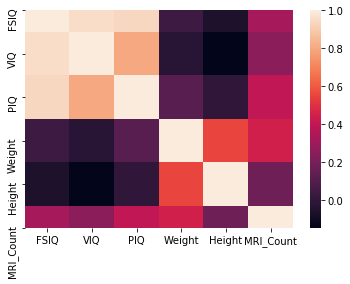

In [14]:
wcorr = womenNoGenderDf.corr()
sns.heatmap(wcorr)

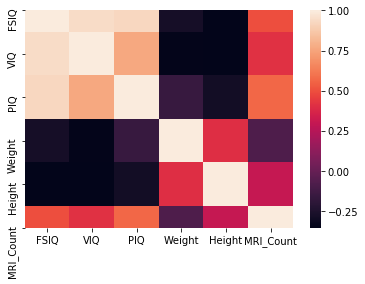

In [15]:
mcorr = menNoGenderDf.corr()
sns.heatmap(mcorr)

Muchos pares de variables presentan una correlación cercana a cero. ¿Qué significa?

Que tienen valores muy bajos los datos en general y no tienen relacion las variables

¿Por qué se separan los géneros?

Para tener un buen analisis de datos y asi poder compararlos mas facil

Qué variables tienen una correlación más estrecha con el tamaño del cerebro (MRI_Count)? ¿Es eso lo que se espera?

FSIQ, PIQ